In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

from models.dec import DenseEncoder, DenseDecoder, DEC, pretraining, train_dec

DATA_ROOT = Path('processed_data')
PREPROCESSING_METHOD = 'raw'
FOLD_ID = 0

X_train = np.load(DATA_ROOT / PREPROCESSING_METHOD / f"fold_{FOLD_ID}" / 'X_train.npy')
y_train = np.load(DATA_ROOT / PREPROCESSING_METHOD / f"fold_{FOLD_ID}" / 'y_train.npy')
# Shuffle both arrays
p = np.random.permutation(len(X_train))
X_train, y_train = X_train[p], y_train[p]

X_val = np.load(DATA_ROOT / PREPROCESSING_METHOD / f"fold_{FOLD_ID}" / 'X_val.npy')
y_val = np.load(DATA_ROOT / PREPROCESSING_METHOD / f"fold_{FOLD_ID}" / 'y_val.npy')
# Shuffle both arrays
p = np.random.permutation(len(X_val))
X_val, y_val = X_val[p], y_val[p]

print(f"Training dataset: {X_train.shape}; Validation dataset: {X_val.shape}")

Training dataset: (5668, 200); Validation dataset: (13250, 200)


In [2]:
input_dim = X_train.shape[-1]
latent_dim = 32
n_epochs = 10
n_clusters = len(np.unique(y_train))
device = 'cuda'

encoder = DenseEncoder(input_dim, latent_dim)
decoder = DenseDecoder(latent_dim, input_dim)

pretraining(encoder, decoder, X_train, X_val, n_epochs=n_epochs, device=device)
dec_model = train_dec(encoder, X_train, n_clusters, latent_dim)

Pretraining using device: cuda
Epoch 1/10
Training time: 0.27s; Training loss: 148.00189;
Validation time: 0.03s; Evalutation loss: 64.91897;

Epoch 2/10
Training time: 0.07s; Training loss: 98.40826;
Validation time: 0.03s; Evalutation loss: 58.58520;

Epoch 3/10
Training time: 0.07s; Training loss: 84.64463;
Validation time: 0.03s; Evalutation loss: 49.63489;

Epoch 4/10
Training time: 0.07s; Training loss: 74.75017;
Validation time: 0.03s; Evalutation loss: 44.20582;

Epoch 5/10
Training time: 0.07s; Training loss: 67.41159;
Validation time: 0.03s; Evalutation loss: 40.11980;

Epoch 6/10
Training time: 0.07s; Training loss: 61.92423;
Validation time: 0.03s; Evalutation loss: 36.90160;

Epoch 7/10
Training time: 0.07s; Training loss: 57.28077;
Validation time: 0.03s; Evalutation loss: 34.88772;

Epoch 8/10
Training time: 0.07s; Training loss: 54.03616;
Validation time: 0.03s; Evalutation loss: 33.57648;

Epoch 9/10
Training time: 0.07s; Training loss: 51.63125;
Validation time: 0.03s

/tmp/ipykernel_137352/1994487209.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(z_enc[y_val == class_id, 0], z_enc[y_val == class_id, 1], c=colors[class_id], s=5, alpha=.1)


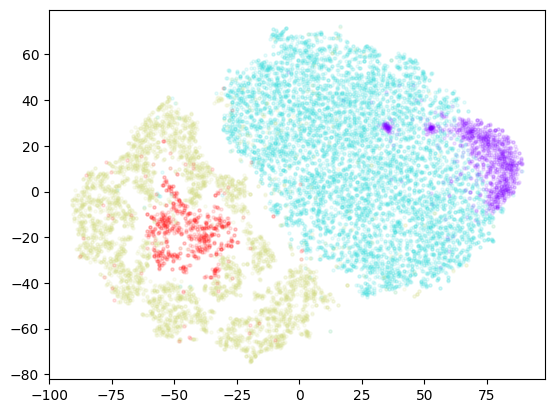

In [20]:
z = encoder(torch.from_numpy(X_val).to(torch.float32).to(device)).detach().cpu().numpy()
tsne = TSNE(n_components=2)
z_enc = tsne.fit_transform(z)

colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(y_val))))
for class_id in np.unique(y_val):
    plt.scatter(z_enc[y_val == class_id, 0], z_enc[y_val == class_id, 1], c=colors[class_id], s=5, alpha=.1)

plt.show()